1. 
(1) Simple Linear Regression uses one predictor (independent variable) to model the relationship with the response (dependent variable).We can use a equation to expressed as 𝑦=(𝛽_0)+(𝛽_1)𝑥.However for the Multiple Linear Regression, it involves two or more predictors, allowing a more complex relationship with the response. The equation can be expressed as 𝑦=(𝛽_0)+(𝛽_1)(𝑥_1)+(𝛽_2)(𝑥_2)+⋯+(𝛽_𝑛)(𝑥_𝑛).For the benefits of multiple linear regression, it captures relationships between the response and multiple predictors, offering more accurate and nuanced predictions than the Simple linear regression, especially when the response depends on several variables.
(2) A continuous variable provides a smooth, linear prediction line, while an indicator variable, being binary, creates two parallel lines for two groups with the same slope but different intercepts. Each form represents distinct ways to model relationships depending on variable types.
(3) Including both a continuous and indicator variable in a Multiple Linear Regression model allows for a common slope but distinct intercepts for each group, meaning the model expects similar data trends across groups with baseline differences.
(4) Adding an interaction term between a continuous and indicator variable allows the model to have separate slopes and intercepts for each group. This enables the model to capture different trends for each group, adding flexibility in predicting group-specific outcomes.
(5) When the model includes only indicator variables from a categorical variable, it expects distinct groups and uses dummy encoding for each, with separate intercepts for each group. This setup represents the categorical data accurately while avoiding multicollinearity by omitting one reference category.

2.
(1) For this scenario, the outcome variable is sales, while the predictor variables are the advertising budgets for TV and online platforms. Since the effectiveness of one medium might depend on the budget allocated to the other, an interaction effect should be considered. Without interaction, the model would simply add the contributions of each advertising budget independently, assuming no influence between them. With interaction, however, the model captures a potential synergy, where increasing one budget could amplify or alter the effect of the other, leading to more complex predictions based on their combined impact.

(2) If the advertising budgets are categorized as "high" or "low" instead of continuous amounts, the model can still operate with or without interaction. Without interaction, it would separately assess the impact of high or low budgets in each category. With interaction, the model would add a term that accounts for the combined effect of both budgets being high, allowing predictions to reflect a possible boost in sales when both budgets are maximized.

3. 
Step 1:Start by importing the required libraries and loading the dataset from the URL.
Step 2:Check the data structure and identify variables for modeling.
Step 3:Choose the outcome (dependent) variable and predictors (independent variables). For illustration, let's assume outcome_variable as the dependent variable and a few sample predictors such as predictor1, predictor2, and predictor3.
Step 4:If there's a hypothesis that an interaction effect between predictors could impact the outcome, add interaction terms.

In [9]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(url)

# Print all the column names to see the exact names
print("Column names in the dataset:")
print(data.columns)

# Clean column names by stripping any leading/trailing spaces
data.columns = data.columns.str.strip()

# Print again after cleaning
print("\nCleaned column names:")
print(data.columns)

# Check if the necessary columns are in the dataframe
required_columns = ['Sales', 'TV_Ad_Budget', 'Online_Ad_Budget']
for col in required_columns:
    if col not in data.columns:
        print(f"Column '{col}' is missing!")
    else:
        print(f"Column '{col}' found.")

# Now check for missing values (if the columns exist)
if all(col in data.columns for col in required_columns):
    print("\nChecking for missing values in 'Sales', 'TV_Ad_Budget', 'Online_Ad_Budget':")
    print(data[required_columns].isnull().sum())
else:
    print("\nOne or more of the required columns are missing!")




/tmp/ipykernel_71/2664819584.py:5: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


Column names in the dataset:
Index(['UNIQUE_id', 'UNIQUE_num_records', 'ELIGIBLE_consent',
       'GEO_residence_canada', 'GEO_province', 'DEMO_age', 'DEMO_gender',
       'DEMO_identity_vetrans', 'DEMO_identity_indigenous',
       'DEMO_identity_lgbtq',
       ...
       'PSYCH_body_self_image_questionnaire_height_dissatisfaction_score',
       'PSYCH_body_self_image_questionnaire_fatness_evaluation_score',
       'PSYCH_body_self_image_questionnaire_negative_affect_score',
       'PSYCH_body_self_image_questionnaire_social_dependence_score',
       'PSYCH_big_five_inventory_agreeable_score',
       'PSYCH_big_five_inventory_conscientious_score',
       'PSYCH_big_five_inventory_extraverted_score',
       'PSYCH_big_five_inventory_neurotic_score',
       'PSYCH_big_five_inventory_open_score', 'REMOVE_case'],
      dtype='object', length=1794)

Cleaned column names:
Index(['UNIQUE_id', 'UNIQUE_num_records', 'ELIGIBLE_consent',
       'GEO_residence_canada', 'GEO_province', 'DEMO_age', 

4. 
The apparent contradiction arises from how regression results, particularly R-squared (which indicates the proportion of variability explained) and statistical significance (of individual coefficients), are interpreted. R-squared of 0.176 means that only 17.6% of the variability in Pokémon hit points (HP) is explained by the predictors `Sp. Def` and `Generation`, along with their interaction, leaving much unexplained variance. However, the coefficients for these predictors are statistically significant, with p-values indicating strong evidence against the null hypothesis, suggesting that they have a meaningful impact on HP. The contradiction occurs because R-squared measures the total variance explained, while statistical significance assesses the individual influence of predictors. Despite significant predictors, the low R-squared suggests that other factors, such as omitted variables, multicollinearity, non-linear relationships, or model complexity, could be contributing to the unexplained variability in HP. This highlights the distinction between the roles of explained variance and statistical significance in regression analysis. High significance doesn't ensure a high R-squared, and a low R-squared doesn't necessarily negate the importance of the predictors.

5. 
The provided code demonstrates how to train and evaluate two linear regression models (model3 and model4) using a Pokémon dataset. It starts by splitting the data into training and testing sets, with 50% allocated to the training set. Missing values in the dataset are handled by replacing them with the string `'None'`, and then the data is split using `train_test_split` from scikit-learn.

Model 3 is a simpler linear regression model with `Attack` and `Defense` as predictors for `HP`. After fitting the model to the training data, the in-sample R-squared value is calculated to measure how well the model explains the variance in `HP`. The out-of-sample R-squared is also computed by comparing the actual and predicted values on the test set, showing how well the model generalizes to unseen data.

In contrast, Model 4 is a more complex regression model that includes multiple predictors, interactions, and even higher-order effects. This model allows for greater flexibility but also introduces computational challenges, especially with the large number of interaction terms. The model is fit to the training data, and a summary of the results is printed, including coefficients and statistical measures.

Both models are then evaluated based on in-sample and out-of-sample R-squared values. In-sample R-squared measures how well the model fits the training data, while out-of-sample R-squared shows the model's ability to generalize to new data. A large difference between the two may indicate overfitting, while similar values suggest good generalization.

The code illustrates the trade-offs between simple and complex models. Model 3 provides a basic baseline with fewer predictors, while Model 4, with its more intricate structure, might offer better performance but risks overfitting. The comparison of R-squared values helps assess model effectiveness and generalization.

6. 
The design matrix for model4** includes many predictor variables and interaction terms, which result from the formula 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")'. This formula creates new variables representing main effects and interactions between predictors, which are added as columns in the design matrix. However, the presence of these interaction terms can lead to multicollinearity, where predictors become highly correlated. For example, Attack and Attack * Defense are likely to be highly correlated. Multicollinearity makes it difficult for the model to estimate coefficients accurately, leading to unstable estimates and poor generalization to new data. This is reflected in the model’s condition number, which measures the stability of the design matrix—larger values indicate high multicollinearity. Despite applying centering and scaling to the predictors, the condition number remains high, pointing to persistent multicollinearity. This results in overfitting, where the model performs well on training data but struggles to generalize to unseen data.

7. 
The development of model5_linear_form, model6_linear_form, and model7_linear_form follows a progression of refining earlier models by adding more variables, focusing on key predictors, and introducing interaction terms. Starting with model5, which builds on model3 by incorporating additional predictors like Speed, Legendary, and categorical variables such as Generation and Pokémon types, the aim is to capture more data complexity. Model6 refines this by narrowing the predictors to the most significant ones and adding specific indicator variables based on prior results. Model7 takes this further by introducing interaction terms between key predictors to explore their combined effects on HP. Finally, model7_CS improves upon model7 by centering and scaling continuous predictors to reduce multicollinearity and enhance model stability. Each successive model step seeks to improve predictive accuracy and generalization while addressing issues like multicollinearity and scaling imbalances.

8. 
We can use a for loop to iterate through multiple model builds to explore the variability in model performance. Each with a different train-test data split. By omitting the random seed, we ensure that each iteration uses a unique data split, resulting in diverse performance metrics. This approach helps us understand the stability and generalizability of the model by comparing in-sample and out-of-sample performance across iterations. For each iteration, we fit a model on the training data and calculate R-squared values for both in-sample and out-of-sample data. The results are visualized in a scatter plot, showing how the model performs under different splits. This method reveals the degree of overfitting (if in-sample performance far exceeds out-of-sample performance) and helps assess model robustness. By demonstrating how model performance can vary across different data partitions, this method emphasizes the importance of validating models on unseen data for better generalization.

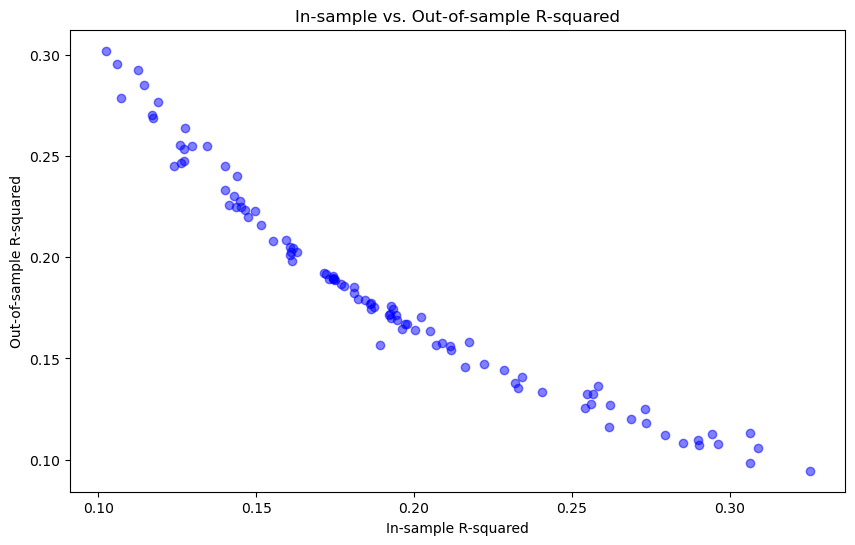

Average In-sample R-squared: 0.19161662267954213
Average Out-of-sample R-squared: 0.18435309981475229


In [10]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

# Replace NaN values in 'Type 2' column with 'None'
pokeaman.fillna('None', inplace=True)

# Initialize a list to collect the results
in_sample_r2 = []
out_of_sample_r2 = []

# Loop for multiple iterations (for demonstration purposes, let's do 100 iterations)
for _ in range(100):
    # Split data randomly without setting random seed
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Define the model (simplified for this example)
    model_spec = smf.ols(formula='HP ~ Attack + Defense', data=pokeaman_train)
    model_fit = model_spec.fit()
    
    # In-sample R-squared
    in_sample_r2.append(model_fit.rsquared)
    
    # Out-of-sample R-squared
    yhat_test = model_fit.predict(pokeaman_test)
    y_test = pokeaman_test['HP']
    out_of_sample_r2.append(np.corrcoef(y_test, yhat_test)[0, 1] ** 2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(in_sample_r2, out_of_sample_r2, alpha=0.5, color='blue')
plt.title('In-sample vs. Out-of-sample R-squared')
plt.xlabel('In-sample R-squared')
plt.ylabel('Out-of-sample R-squared')
plt.show()

# Optional: Print average R-squared for both in-sample and out-of-sample
print(f"Average In-sample R-squared: {np.mean(in_sample_r2)}")
print(f"Average Out-of-sample R-squared: {np.mean(out_of_sample_r2)}")


9. 
-Generalization to Future Data: The key takeaway from this analysis is how well each model can predict the HP of Pokeaman from a generation not included in the training data. By assessing the out-of-sample R-squared for Pokémon from Generation 6 (or other test generations), we determine how well the model generalizes to new, unseen data. A high out-of-sample R-squared indicates good future prediction performance, while a low value suggests overfitting and poor generalization.

-Comparison Between Models: Comparing model6 and model7 helps us assess which model performs better in predicting HP for future generations of Pokeaman. If model7 shows a higher out-of-sample R-squared for Generation 6 data, it indicates that the interaction terms in model7 offer better predictions than the linear relationships in model6. On the other hand, if model6 performs better, it suggests that simpler relationships between variables might generalize better to future data than the complex interactions in model7.

-Overfitting Concerns: A significant difference between in-sample and out-of-sample R-squared values could indicate overfitting. For instance, if the in-sample R-squared is high but the out-of-sample R-squared is low, it suggests that the model is too closely fitted to the training data and struggles to generalize to new, unseen data.

-Evaluating Model Robustness Across Generations: Evaluating models on training sets from Generations 1–5 and testing them on future generations, like Generation 6, helps us understand the robustness and adaptability of the models to changes in the data distribution over time. This evaluation reveals how well the models can handle new, different data as Pokeaman generations evolve.

Chatlog:Here’s a summary of our chat:

1. **Data Analysis Project**: You are working on a project using the Pokémon dataset and performing regression analysis to predict HP (hit points) using various factors like Attack, Defense, Special Defense, and Generation, among others.

2. **Exploring Model Performance**: 
   - We discussed various models, including multiple specifications for regression models using `statsmodels` (e.g., `model3_fit`, `model4_fit`, `model5_fit`, etc.) to predict HP and evaluate the models’ performance.
   - You performed multiple iterations of fitting regression models to assess both in-sample and out-of-sample R-squared values, comparing how well models generalize when tested on unseen data (e.g., future generations like Generation 6).
   - We explored issues like multicollinearity in the design matrix and its effect on model performance, as well as the importance of centering and scaling variables to mitigate problems with condition numbers.

3. **Model Extension**: 
   - You extended model specifications step-by-step (e.g., from `model3` to `model4`, `model5`, and `model6`) and tested how adding more variables (e.g., different Pokémon generations, types, or interactions between variables) affected model performance.
   - We examined how different training sets (e.g., Generation 1, 1–5, and 6) influenced predictions and discussed how these changes affect the model's ability to generalize.

4. **Out-of-Sample Testing**: 
   - You tested the generalization ability of your models by applying them to subsets of the data that were not part of the training set (e.g., predicting the HP of Pokémon from Generation 6 when the model was trained on Generations 1–5).
   - You compared the in-sample and out-of-sample R-squared values to assess how well the models performed when predicting unseen data, checking for overfitting and the robustness of the models.

5. **Generalization and Multicollinearity**: 
   - The discussion emphasized how multicollinearity in predictor variables (reflected in high correlations among predictors) can hinder model generalization, leading to poor out-of-sample predictions.
   - We discussed the importance of reducing collinearity through methods like centering and scaling, but also noted that this didn’t always fully resolve the issue in more complex models with many interactions.

Throughout the conversation, we focused on exploring different approaches to regression modeling, interpreting the results, and understanding how well the models generalize to new data.

Website: https://chatgpt.com/c/67361d66-ea04-8011-a794-b5432b2e30c1